# GARCH Stock Forecasting

## Read Data

In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

## DIS Volatility

In [2]:
dis = pd.read_csv("../../store.csv",header=0,index_col=0)
dis["Date"] = pd.to_datetime(dis["Date"])
dis.set_index('Date', inplace=True)
# dis.drop(columns=['Volume'],axis=1,inplace=True)
dis.pop('Volume')
dis.head(10)

,Open,High,Low,Close
Date,,,,
2014-04-10,12937.4,13055.6,12881.2,12949.4
2014-04-11,12822.2,12934.9,12778.0,12840.2
2014-04-15,12830.5,12831.6,12537.7,12579.9
2014-04-16,12557.4,12727.0,12514.8,12563.2
2014-04-17,12564.5,12819.1,12514.8,12787.2
2014-04-21,12845.3,13002.8,12838.8,12958.5
2014-04-22,12989.5,13040.2,12913.9,12987.1
2014-04-23,12961.3,13176.0,12957.9,13122.1
2014-04-25,13134.5,13268.6,12968.8,13034.5


In [3]:
returns = 100*dis.Close.pct_change().dropna()
returns

Date
2014-04-11   -0.843282
2014-04-15   -2.027227
2014-04-16   -0.132751
2014-04-17    1.782985
2014-04-21    1.339621
                ...   
2024-04-03    0.165736
2024-04-04    0.916655
2024-04-05    0.899382
2024-04-08    0.182810
2024-04-09    0.306391
Name: Close, Length: 2469, dtype: float64

Text(0.5, 1.0, 'DIS Returns')

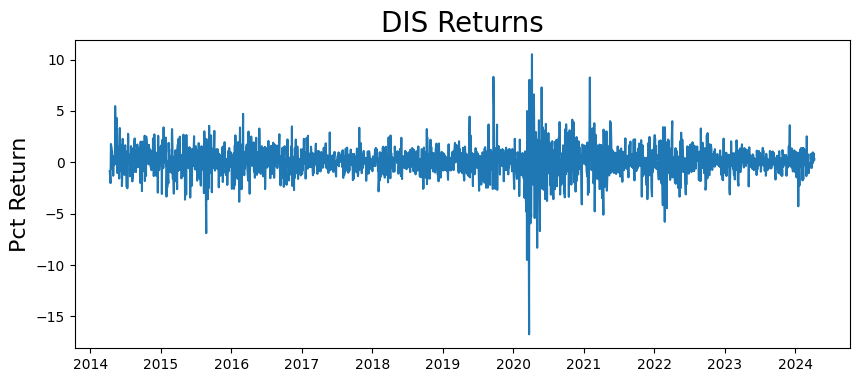

In [4]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

## PACF

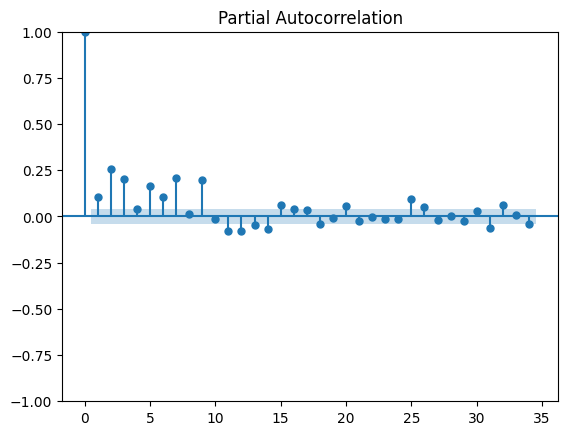

In [5]:
plot_pacf(returns**2)
plt.show()

In [6]:
model = arch_model(returns, p=3, q=3)

In [7]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 14932.011355791656
Iteration:      2,   Func. Count:     23,   Neg. LLF: 16989.30667289805
Iteration:      3,   Func. Count:     36,   Neg. LLF: 4791.641421126351
Iteration:      4,   Func. Count:     47,   Neg. LLF: 730609821.2927501
Iteration:      5,   Func. Count:     57,   Neg. LLF: 4484.494681580398
Iteration:      6,   Func. Count:     67,   Neg. LLF: 4010.784028342087
Iteration:      7,   Func. Count:     77,   Neg. LLF: 4031.4843570190546
Iteration:      8,   Func. Count:     87,   Neg. LLF: 3999.979694055255
Iteration:      9,   Func. Count:     97,   Neg. LLF: 3961.04085839126
Iteration:     10,   Func. Count:    107,   Neg. LLF: 3962.465065747929
Iteration:     11,   Func. Count:    117,   Neg. LLF: 3962.2340693591027
Iteration:     12,   Func. Count:    127,   Neg. LLF: 3981.137636365449
Iteration:     13,   Func. Count:    137,   Neg. LLF: 3959.8845412004102
Iteration:     14,   Func. Count:    147,   Neg. LLF: 3960.94

In [8]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3955.07
Distribution:                  Normal   AIC:                           7926.13
Method:            Maximum Likelihood   BIC:                           7972.63
                                        No. Observations:                 2469
Date:                Fri, Apr 12 2024   Df Residuals:                     2468
Time:                        00:13:56   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0904  5.434e-02      1.663  9.631e-02 [-1.614e-02,  0.197]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.0599      0.580      0.103      0.918 [ -1.076,  1.196]
alpha[1]       0.0673      0.239      0.282      0.778 [ -0.401,  0.535]
alpha[2]       0.0420      0.814  5.167e-02      0.959 [ -1.553,  1.637]
alpha[3]       0.0715      1.101  6.493e-02      0.948 [ -2.086,  2.229]
beta[1]        0.0000     10.006      0.000      1.000 [-19.611, 19.611]
beta[2]        0.6386      1.819      0.351      0.726 [ -2.926,  4.204]
beta[3]        0.1511      9.839  1.536e-02      0.988 [-19.133, 19.435]
========================================================================

Covariance estimator: robust
"""

In [9]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [10]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

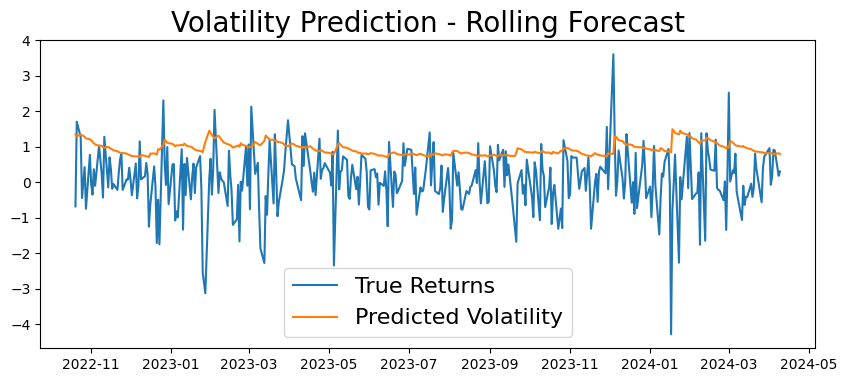

In [11]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [12]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [13]:
# spy = web.DataReader('SPY', 'yahoo', start=start, end=end)
spy = pd.read_csv("../../store.csv",header=0,index_col=0)
spy["Date"] = pd.to_datetime(spy["Date"])
spy.set_index('Date', inplace=True)
spy.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2014-04-10,12937.4,13055.6,12881.2,12949.4,0
2014-04-11,12822.2,12934.9,12778.0,12840.2,0
2014-04-15,12830.5,12831.6,12537.7,12579.9,0
2014-04-16,12557.4,12727.0,12514.8,12563.2,0
2014-04-17,12564.5,12819.1,12514.8,12787.2,0
2014-04-21,12845.3,13002.8,12838.8,12958.5,0
2014-04-22,12989.5,13040.2,12913.9,12987.1,0
2014-04-23,12961.3,13176.0,12957.9,13122.1,0
2014-04-25,13134.5,13268.6,12968.8,13034.5,0


In [14]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

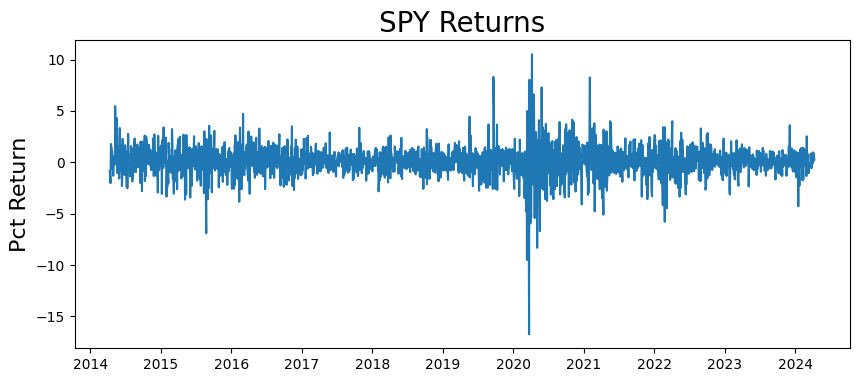

In [15]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

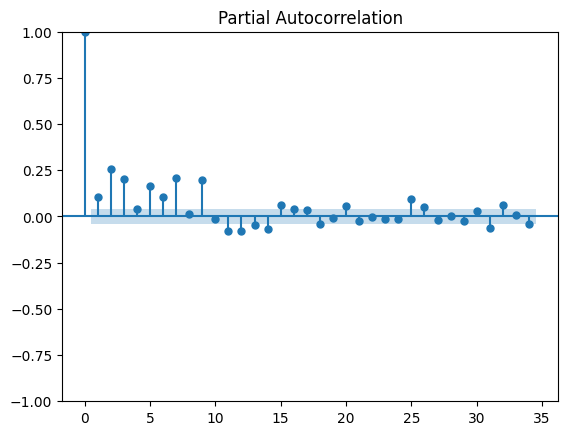

In [16]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [17]:
model = arch_model(returns, p=2, q=2)

In [18]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 3309094231716.9014
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1986920923.8712919
Iteration:      3,   Func. Count:     29,   Neg. LLF: 5467.671657338031
Iteration:      4,   Func. Count:     38,   Neg. LLF: 3990.128853563045
Iteration:      5,   Func. Count:     46,   Neg. LLF: 3978.4925590865264
Iteration:      6,   Func. Count:     54,   Neg. LLF: 3978.7267141954158
Iteration:      7,   Func. Count:     62,   Neg. LLF: 3974.9486520078067
Iteration:      8,   Func. Count:     70,   Neg. LLF: 3980.1134371050084
Iteration:      9,   Func. Count:     78,   Neg. LLF: 3978.4689006691856
Iteration:     10,   Func. Count:     86,   Neg. LLF: 3960.979041692734
Iteration:     11,   Func. Count:     94,   Neg. LLF: 3961.8549480859665
Iteration:     12,   Func. Count:    102,   Neg. LLF: 3966.1432414331302
Iteration:     13,   Func. Count:    110,   Neg. LLF: 3958.416695243433
Iteration:     14,   Func. Count:    117,   Neg. LLF: 3

In [19]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3956.53
Distribution:                  Normal   AIC:                           7925.07
Method:            Maximum Likelihood   BIC:                           7959.94
                                        No. Observations:                 2469
Date:                Fri, Apr 12 2024   Df Residuals:                     2468
Time:                        00:14:11   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0923  2.227e-02      4.145  3.399e-05 [4.865e-02,  0.136]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0464  1.645e-02      2.824  4.745e-03 [1.421e-02,7.867e-02]
alpha[1]       0.1014  3.967e-02      2.556  1.058e-02   [2.366e-02,  0.179]
alpha[2]       0.0475  5.821e-02      0.815      0.415  [-6.663e-02,  0.162]
beta[1]    8.6264e-15      0.315  2.740e-14      1.000     [ -0.617,  0.617]
beta[2]        0.8285      0.294      2.819  4.817e-03     [  0.252,  1.405]
============================================================================

Covariance estimator: robust
"""

## Rolling Forecast

In [20]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [21]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

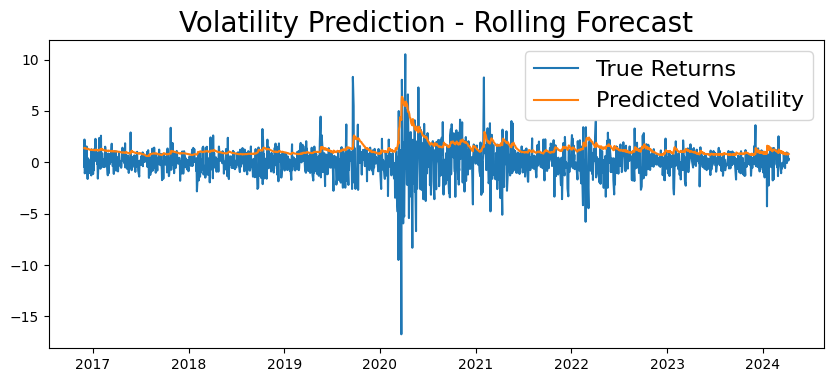

In [22]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [23]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [24]:
from dateutil.relativedelta import relativedelta

In [25]:
pred = model_fit.forecast(horizon=7)
# returns.head()
future_dates = [returns.index[-1] + relativedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

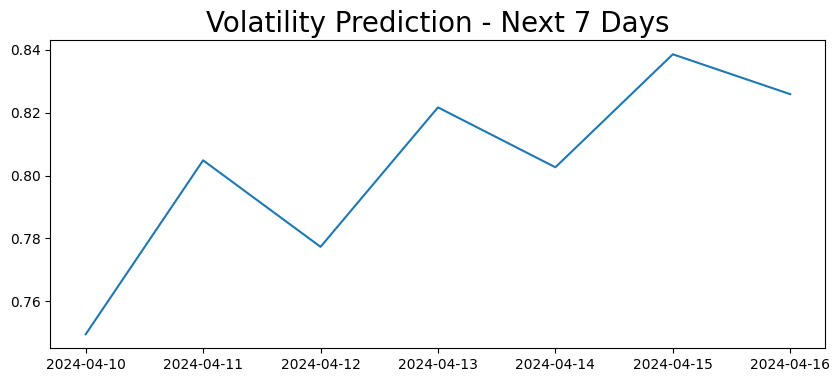

In [26]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)